In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files/paths to load
city_data_toload = "Resources/city_data.csv"
ride_data_toload = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a Pandas DataFrame
city_data_df = pd.read_csv(city_data_toload)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame
ride_data_df = pd.read_csv(ride_data_toload)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Inspect data for missing, malformed, or incorrect data

In [6]:
# For the city_data_df:

    # Get all the rows that contain null values.
city_data_df.count()
city_data_df.isnull().sum()
    # Make sure the driver_count column has an integer data type.
city_data_df.dtypes
    # Find out how many data points there are for each type of city.
city_data_df["type"].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [7]:
# or get count data points for each city
#Urban,Suburban,Rural
sum(city_data_df["type"] == "Urban")

66

In [8]:
# For the ride_data_df DataFrame, we need to:

    # Get all the rows that contain null values.
ride_data_df.count()
ride_data_df.isnull().sum()
    # Make sure the fare and ride_id columns are numerical data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [9]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

# Inner join would have worked too

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [37]:
total_ride_count = pyber_data_df.count()

In [11]:
# For the bubble chart, we will need to plot the following:

# The average fare for each type of city on the y-axis
# The total number of rides for each type of city on the x-axis
# Make the size of each marker, or bubble, correlate to the average number of drivers for each type of city
# Here are the steps to create a bubble chart:

# To get the average fare, we can use the Pandas mean() method for each city in the "fare" column.
# To get the total number of rides for each city, we can use the Pandas count() method for each city in the "ride_id" column.
# To make the bubble size correlate to the number of drivers for each city, we can get the average driver_count for each city.
# Completing the steps will be more efficient if we create separate DataFrames for each type and then create Data Series for each step.

# Create three separate DataFrames, one for each type of city.

# Each new DataFrame can be created by filtering the pyber_data_df DataFrame where the city type is equal to Urban, Suburban, or Rural.

In [36]:
# Create the Urban, Suburban, and Rural city DataFrames
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [34]:
# Get the ride count (total rides) for each city of each type
urban_ride_count = urban_cities_df.groupby("city").count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby("city").count()["ride_id"]
rural_ride_count = rural_cities_df.groupby("city").count()["ride_id"]

In [23]:
# We now have ONE of the three datasets we need to create a bubble chart

In [29]:
# Get average fare for each city of each type:  Urban, Suburban, Rural
urban_avg_fare = urban_cities_df.groupby("city").mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby("city").mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [30]:
# Now we have TWO of three datasets we need to create a bubble chart

In [39]:
# Get the average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby("city").mean()["driver_count"]

# also found in city_data.csv file but not grouped by type

# Next, suburban and rural
suburban_driver_count = suburban_cities_df.groupby("city").mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby("city").mean()["driver_count"]

In [40]:
# Now we have ALL our data and can begin to create our bubble chart

In [43]:
# Create a scatter plot for each type of city where the following conditions are met:

# The x-axis is the number of rides for each city.
# The y-axis is the average fare for each city.
# The size of each marker is the average number of drivers in each city.

# create each scatter plot individually and add them all to one chart using MATLAB method

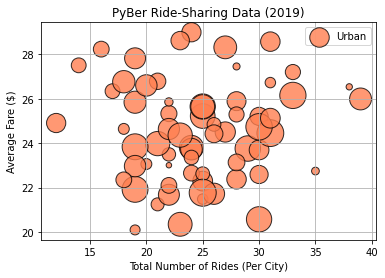

In [53]:
# Urban first: x_axis = urban_ride_count, y_axis = urban_avg_fare
plt.scatter(urban_ride_count, urban_avg_fare,
            s=10*urban_driver_count,
           c='coral',
           edgecolor='black',
           linewidths=1,
           alpha=0.8,
           label='Urban')
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend
plt.legend()

In [54]:
# Backtrack and add title, axes labels, legend, and change color/size of markers    

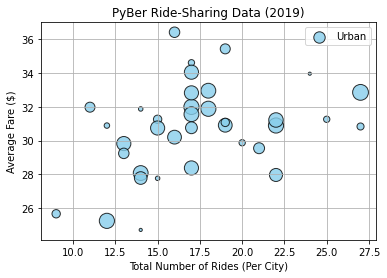

In [56]:
# Suburban Bubble Chart
plt.scatter(suburban_ride_count, suburban_avg_fare,
            s=10*suburban_driver_count,
           c='skyblue',
           edgecolor='black',
           linewidths=1,
           alpha=0.8,
           label='Urban')
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend
plt.legend()

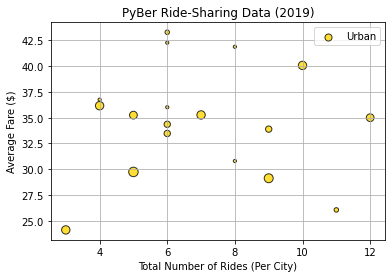

In [57]:
# Rural Chart
plt.scatter(rural_ride_count, rural_avg_fare,
            s=10*rural_driver_count,
           c='gold',
           edgecolor='black',
           linewidths=1,
           alpha=0.8,
           label='Urban')
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend
plt.legend()

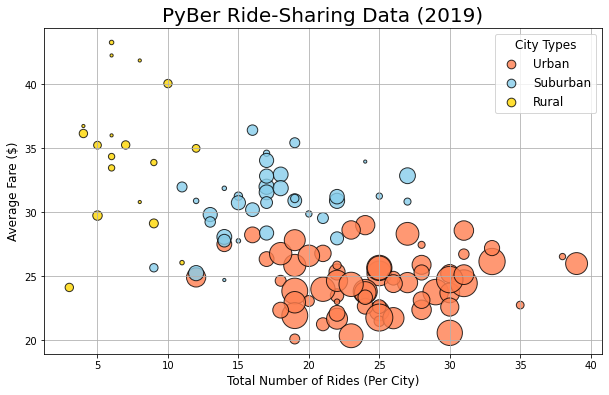

In [64]:
# Combine and run all in one cell:
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Add a title, labels for the axes, a legend, and a grid for all three charts and increase the font size
# of the axes labels to 12 and the title to 20.  Enlarge the figure

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.grid(True)

# plt.legend() returns legend with varying sizes for city types
# Customize the legend to scale them to the same size.
# Declare a variable for the legend function, lgnd = plt.legend(), and add parameters for font size, legend location, 
    # and legend title, along with some other features
# Then, use legendHandles[]._sizes to set the font size of the marker in the legend to a fixed size.
# Create legend:
lgnd = plt.legend(fontsize='12', mode='Expanded',
        scatterpoints=1, loc='best', title='City Types')

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Show the plot
plt.show()